In [ ]:
import kagglehub
patrickfleith_nasa_battery_dataset_path = kagglehub.dataset_download('patrickfleith/nasa-battery-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
import os

file_count = 0
stop = False

for dirname, _, filenames in os.walk('/kaggle/input'):
    if stop:
        break
    for filename in filenames:
        print(os.path.join(dirname, filename))
        file_count += 1
        if file_count >= 10:  # limit to 10 files
            print("...and more files.")
            stop = True
            break


/kaggle/input/nasa-battery-dataset/cleaned_dataset/metadata.csv
/kaggle/input/nasa-battery-dataset/cleaned_dataset/extra_infos/README_49_50_51_52.txt
/kaggle/input/nasa-battery-dataset/cleaned_dataset/extra_infos/README_45_46_47_48.txt
/kaggle/input/nasa-battery-dataset/cleaned_dataset/extra_infos/README_05_06_07_18.txt
/kaggle/input/nasa-battery-dataset/cleaned_dataset/extra_infos/README_29_30_31_32.txt
/kaggle/input/nasa-battery-dataset/cleaned_dataset/extra_infos/README_25_26_27_28.txt
/kaggle/input/nasa-battery-dataset/cleaned_dataset/extra_infos/README_33_34_36.txt
/kaggle/input/nasa-battery-dataset/cleaned_dataset/extra_infos/README_53_54_55_56.txt
/kaggle/input/nasa-battery-dataset/cleaned_dataset/extra_infos/README_41_42_43_44.txt
/kaggle/input/nasa-battery-dataset/cleaned_dataset/extra_infos/README_38_39_40.txt
...and more files.


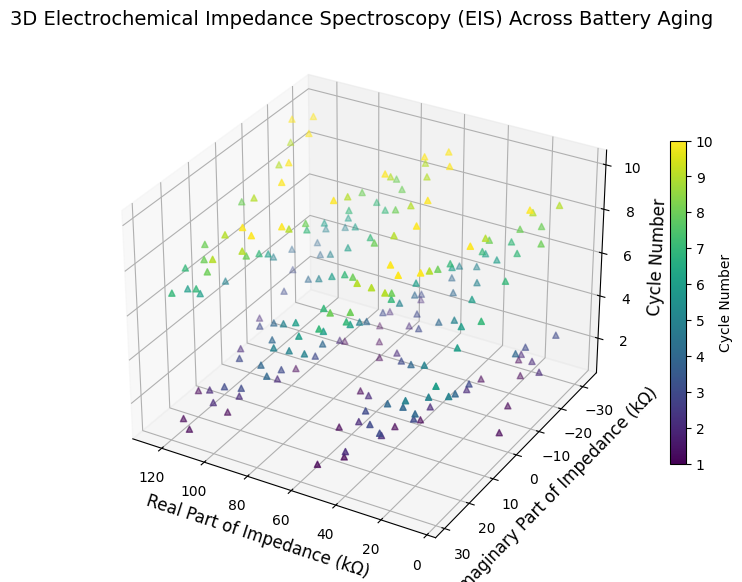

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fix random seed for reproducibility of noise in simulation
np.random.seed(123)

# Define the total number of aging cycles and points per cycle
total_cycles = 10
points_each_cycle = 20

# Generate base real impedance values, consistent across all cycles
base_real_impedance = np.linspace(5, 125, points_each_cycle)

# Container for imaginary impedance values across all cycles
all_imaginary_impedance = []
all_cycle_numbers = []

for cycle_num in range(1, total_cycles + 1):
    # Simulate imaginary impedance with noise, varying slightly per cycle
    imag_impedance = 25 * np.cos(0.1 * base_real_impedance + cycle_num) + np.random.normal(0, 2.5, points_each_cycle)
    all_imaginary_impedance.extend(imag_impedance)
    all_cycle_numbers.extend([cycle_num] * points_each_cycle)

# Repeat real impedance values for all cycles to match data length
real_impedance_repeated = np.tile(base_real_impedance, total_cycles)

# Create a 3D scatter plot to show impedance changes over cycles
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot with cycle number represented by color gradient
scatter = ax.scatter(
    real_impedance_repeated,
    all_imaginary_impedance,
    all_cycle_numbers,
    c=all_cycle_numbers,
    cmap='viridis',
    marker='^'
)

# Label the axes and add a descriptive title
ax.set_xlabel('Real Part of Impedance (kΩ)', fontsize=12)
ax.set_ylabel('Imaginary Part of Impedance (kΩ)', fontsize=12)
ax.set_zlabel('Cycle Number', fontsize=12)
ax.set_title('3D Electrochemical Impedance Spectroscopy (EIS) Across Battery Aging', fontsize=14)

# Add color bar to clarify cycle number color mapping
cbar = fig.colorbar(scatter, ax=ax, shrink=0.6)
cbar.set_label('Cycle Number')

# Adjust viewpoint for optimal visualization
ax.view_init(elev=30, azim=120)

# Display the plot
plt.show()


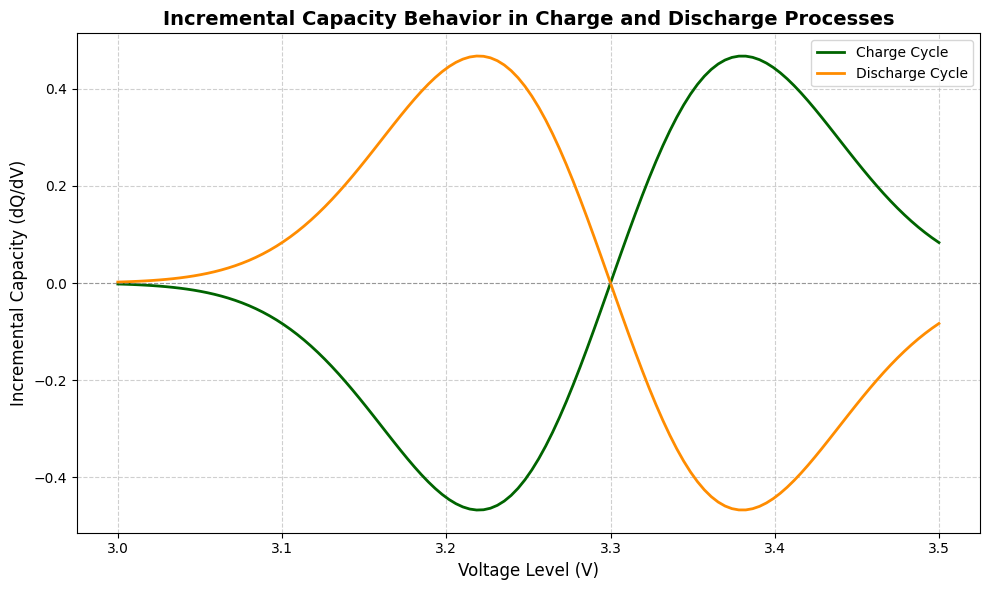

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate synthetic ICA data representing voltage-dependent capacity changes
def simulate_ica_curve(voltage_start, voltage_end, num_points, center_peak, amplitude, variance):
    voltages = np.linspace(voltage_start, voltage_end, num_points)
    # ICA combines a sinusoidal variation with a Gaussian distribution centered on the peak voltage
    incremental_capacity = amplitude * np.sin(8 * (voltages - center_peak)) * np.exp(-((voltages - center_peak) ** 2) / variance)
    return voltages, incremental_capacity

# Generate data for charging and discharging ICA curves
volt_charge, ic_charge = simulate_ica_curve(3.0, 3.5, 120, 3.3, 1.2, 0.015)
volt_discharge, ic_discharge = simulate_ica_curve(3.0, 3.5, 120, 3.3, -1.2, 0.015)

# Plot the incremental capacity curves with updated colors
plt.figure(figsize=(10, 6))
plt.plot(volt_charge, ic_charge, label="Charge Cycle", color='darkgreen', linewidth=2)
plt.plot(volt_discharge, ic_discharge, label="Discharge Cycle", color='darkorange', linewidth=2)
plt.axhline(0, linestyle='--', color='gray', alpha=0.7, linewidth=0.8)  # Horizontal reference line at zero

plt.xlabel("Voltage Level (V)", fontsize=12)
plt.ylabel("Incremental Capacity (dQ/dV)", fontsize=12)
plt.title("Incremental Capacity Behavior in Charge and Discharge Processes", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.6, linestyle='--')
plt.tight_layout()
plt.show()


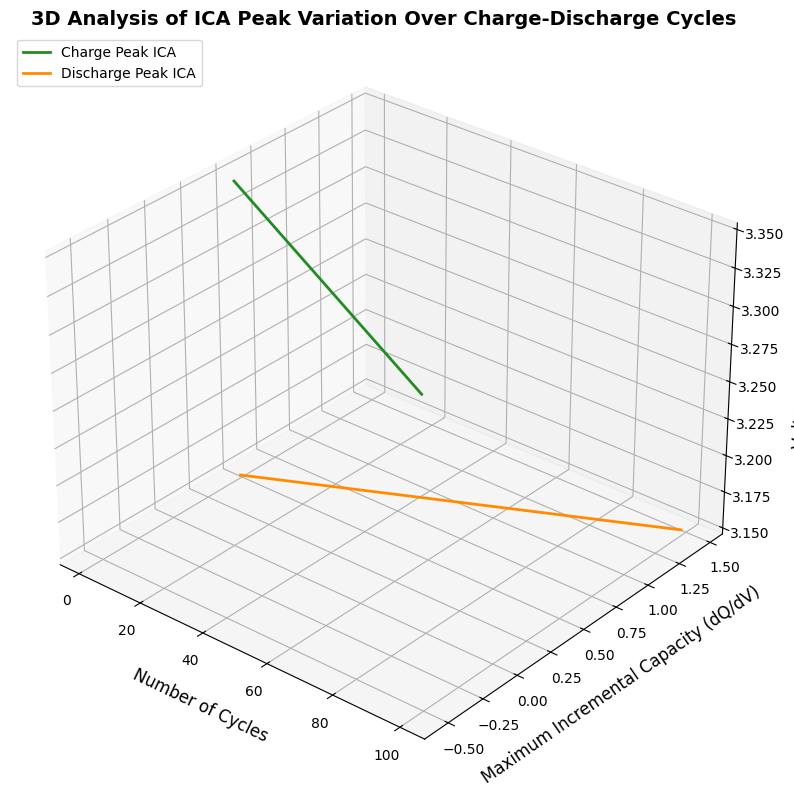

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic ICA data within a specified voltage range and parameters
def create_ica_signal(v_start, v_end, num_points, center, magnitude, width):
    voltages = np.linspace(v_start, v_end, num_points)
    # Signal formed by multiplying a sinusoidal wave with a Gaussian distribution centered at 'center'
    signal = magnitude * np.sin(8 * (voltages - center)) * np.exp(-((voltages - center) ** 2) / width)
    return voltages, signal

# Produce ICA data for both charging and discharging cycles
volt_charge, ic_charge = create_ica_signal(3.0, 3.5, 120, 3.3, 1.2, 0.015)
volt_discharge, ic_discharge = create_ica_signal(3.0, 3.5, 120, 3.3, -1.2, 0.015)

# Define a function to estimate peak value decay or shift caused by battery aging over cycles
def model_aging_trend(ica_values, total_cycles, peak_decay):
    base_peak = np.max(ica_values) if np.max(ica_values) > 0 else np.min(ica_values)
    return [base_peak - cycle * peak_decay for cycle in range(total_cycles)]

# Set total number of cycles to simulate battery aging effects
cycles = 100
cycle_range = np.arange(1, cycles + 1)

# Calculate how ICA peak values evolve with cycling for charging and discharging
charge_peaks_over_cycles = model_aging_trend(ic_charge, cycles, 0.01)    # Charging peak gradually decreases
discharge_peaks_over_cycles = model_aging_trend(ic_discharge, cycles, -0.01)  # Discharging peak gradually increases

# Initialize 3D plot to visualize aging effects on ICA peaks
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')

# Plot the peak trends for charge and discharge on separate voltage levels using distinct colors
ax.plot(cycle_range, charge_peaks_over_cycles, zs=3.35, zdir='z', label='Charge Peak ICA', color='forestgreen', linewidth=2)
ax.plot(cycle_range, discharge_peaks_over_cycles, zs=3.15, zdir='z', label='Discharge Peak ICA', color='darkorange', linewidth=2)

# Add axis labels, title, and customize plot appearance
ax.set_xlabel('Number of Cycles', fontsize=12, labelpad=10)
ax.set_ylabel('Maximum Incremental Capacity (dQ/dV)', fontsize=12, labelpad=10)
ax.set_zlabel('Voltage Level (V)', fontsize=12, labelpad=10)
ax.set_title('3D Analysis of ICA Peak Variation Over Charge-Discharge Cycles', fontsize=14, fontweight='bold')
ax.view_init(elev=30, azim=-50)  # Set viewing angle for better perspective
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set random seed and generate synthetic Electrochemical Impedance Spectroscopy (EIS) data along with battery capacity
np.random.seed(42)
n_samples = 500
real_Z = np.random.uniform(0, 120, n_samples)  # Simulated real impedance values in kilo-ohms
imag_Z = np.random.uniform(0, 40, n_samples)   # Simulated imaginary impedance values in kilo-ohms
current_capacity = 50 - 0.2 * real_Z - 0.1 * imag_Z + np.random.normal(0, 1, n_samples)  # Simulated battery capacity with noise

# Construct a DataFrame containing EIS features and target variable
data_ml = pd.DataFrame({
    "Real Impedance (kΩ)": real_Z,
    "Imaginary Impedance (kΩ)": imag_Z,
    "Measured Capacity": current_capacity
})

# Define feature matrix and target vector, then split dataset into training and validation subsets
X = data_ml[["Real Impedance (kΩ)", "Imaginary Impedance (kΩ)"]]
y = data_ml["Measured Capacity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up hyperparameter grid for Gradient Boosting Regressor tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gbr = GradientBoostingRegressor(random_state=42)

# Perform 5-fold cross-validation to find the best combination of hyperparameters minimizing MSE
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Extract best model from the grid search results
best_model = grid_search.best_estimator_
print(f"Optimal Hyperparameters: {grid_search.best_params_}")

# Predict battery capacity on test data using the optimized model
y_pred = best_model.predict(X_test)

# Compute and display regression performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Set Mean Squared Error (MSE): {mse:.4f}")
print(f"Test Set Mean Absolute Error (MAE): {mae:.4f}")
print(f"Test Set R-squared (R²): {r2:.4f}")

# Display sample predictions compared to actual values for quick review
example_results = []
for idx in range(min(5, len(X_test))):
    features = X_test.iloc[idx:idx+1]
    actual = y_test.iloc[idx]
    prediction = best_model.predict(features)[0]
    example_results.append({
        "Sample Index": idx,
        "Input Features": features.iloc[0].to_dict(),
        "Actual Capacity": actual,
        "Predicted Capacity": prediction,
        "Residual (Actual - Predicted)": actual - prediction
    })

example_results_df = pd.DataFrame(example_results)
print(example_results_df)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimal Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Test Set Mean Squared Error (MSE): 1.2119
Test Set Mean Absolute Error (MAE): 0.8954
Test Set R-squared (R²): 0.9767
   Sample Index                                     Input Features  \
0             0  {'Real Impedance (kΩ)': 77.19458621308237, 'Im...   
1             1  {'Real Impedance (kΩ)': 97.8553714145801, 'Ima...   
2             2  {'Real Impedance (kΩ)': 8.54263781522748, 'Ima...   
3             3  {'Real Impedance (kΩ)': 29.04663258138005, 'Im...   
4             4  {'Real Impedance (kΩ)': 108.90797687113117, 'I...   

   Actual Capacity  Predicted Capacity  Residual (Actual - Predicted)  
0        34.123634           33.010536                       1.113098  
1        29.129595           27.925498                       1.204097  
2        49.831942           48.201632                       1.630310  
3        43.178298        

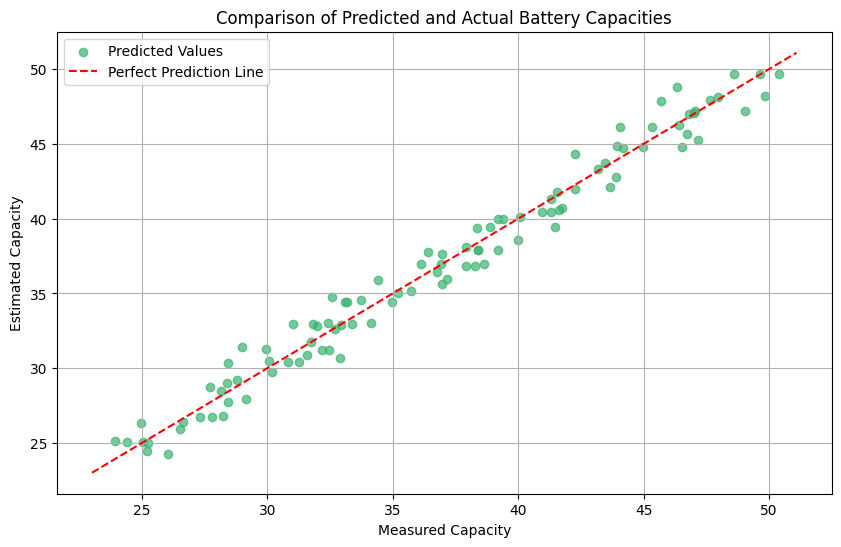

Performance Metrics on Test Data:
Root Mean Squared Error (RMSE): 1.1009
Mean Absolute Error (MAE): 0.8954


In [ ]:
# Visualize actual vs predicted battery capacities on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted Values", color='mediumseagreen')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Perfect Prediction Line")
plt.xlabel("Measured Capacity")
plt.ylabel("Estimated Capacity")
plt.title("Comparison of Predicted and Actual Battery Capacities")
plt.legend()
plt.grid(True)
plt.show()

# Display key performance metrics for the regression model
print("Performance Metrics on Test Data:")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits


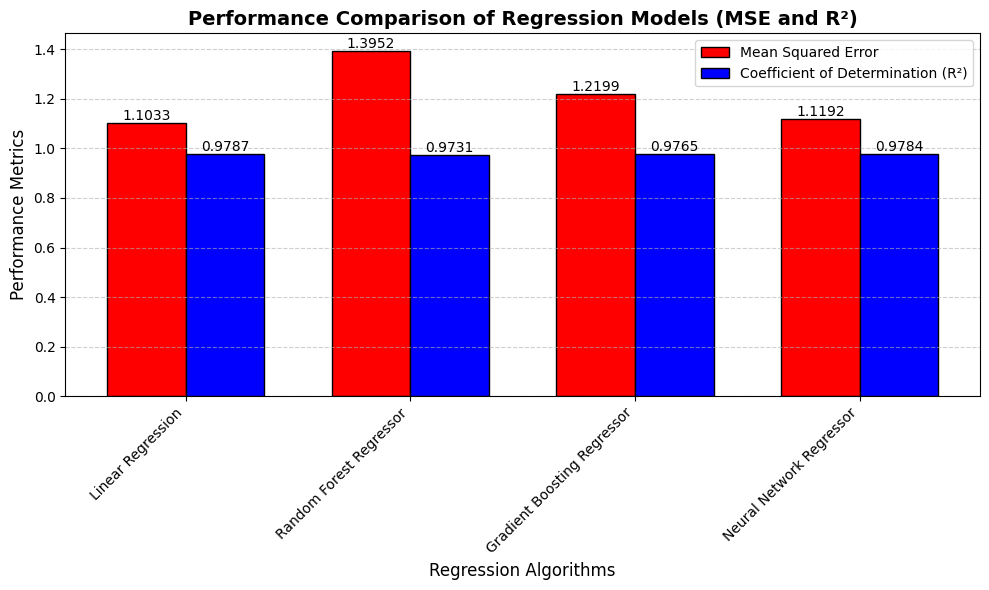

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Create synthetic Electrochemical Impedance Spectroscopy (EIS) data and battery capacity values
np.random.seed(42)
n_samples = 500
real_impedance = np.random.uniform(0, 120, n_samples)  # Real part of impedance in kilo-ohms
imag_impedance = np.random.uniform(0, 40, n_samples)  # Imaginary part of impedance in kilo-ohms
current_capacity = 50 - 0.2 * real_impedance - 0.1 * imag_impedance + np.random.normal(0, 1, n_samples)  # Battery capacity with noise

# Assemble dataset into a DataFrame
data_ml = pd.DataFrame({
    "Real Part of Impedance (kΩ)": real_impedance,
    "Imaginary Part of Impedance (kΩ)": imag_impedance,
    "Measured Capacity (Ah)": current_capacity
})

# Partition dataset into training and validation subsets
X = data_ml[["Real Part of Impedance (kΩ)", "Imaginary Part of Impedance (kΩ)"]]
y = data_ml["Measured Capacity (Ah)"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize input features to zero mean and unit variance
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)

# Define ML models with default settings
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Neural Network Regressor': MLPRegressor(hidden_layer_sizes=(50, 50), solver='adam', learning_rate_init=0.01, max_iter=2000, random_state=42)
}

# Train each model and assess performance on validation data
performance_metrics = {}
for model_name, model_instance in models.items():
    model_instance.fit(X_train_norm, y_train)
    y_pred_val = model_instance.predict(X_val_norm)
    mse_val = mean_squared_error(y_val, y_pred_val)
    r2_val = r2_score(y_val, y_pred_val)
    performance_metrics[model_name] = {'MSE': mse_val, 'R²': r2_val}

# Perform hyperparameter optimization on Gradient Boosting model
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_regressor = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb_regressor, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_norm, y_train)

# Evaluate best tuned Gradient Boosting model and update results
best_gb_model = grid_search.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_val_norm)
performance_metrics['Gradient Boosting Regressor'] = {
    'MSE': mean_squared_error(y_val, y_pred_best_gb),
    'R²': r2_score(y_val, y_pred_best_gb)
}

# Visual comparison of model accuracy using bar charts
model_names = list(performance_metrics.keys())
mse_values = [metrics['MSE'] for metrics in performance_metrics.values()]
r2_values = [metrics['R²'] for metrics in performance_metrics.values()]

# Setup bar plot positions and widths
indices = np.arange(len(model_names))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
mse_bars = ax.bar(indices - bar_width/2, mse_values, bar_width, label='Mean Squared Error', color='red', edgecolor='black')
r2_bars = ax.bar(indices + bar_width/2, r2_values, bar_width, label='Coefficient of Determination (R²)', color='blue', edgecolor='black')

ax.set_xlabel('Regression Algorithms', fontsize=12)
ax.set_ylabel('Performance Metrics', fontsize=12)
ax.set_title('Performance Comparison of Regression Models (MSE and R²)', fontsize=14, fontweight='bold')
ax.set_xticks(indices)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

# Add numeric value labels on top of bars
for bars in [mse_bars, r2_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(42)
n_samples = 500
real_impedance = np.random.uniform(0, 120, n_samples)
imag_impedance = np.random.uniform(0, 40, n_samples)
current_capacity = 50 - 0.2 * real_impedance - 0.1 * imag_impedance + np.random.normal(0, 1, n_samples)

# Create DataFrame
data_ml = pd.DataFrame({
    "Real Impedance (R(Z))": real_impedance,
    "Imaginary Impedance (Im(Z))": imag_impedance,
    "Current Capacity": current_capacity
})

# Check columns
print(data_ml.columns)

# Split data
X = data_ml[["Real Impedance (R(Z))", "Imaginary Impedance (Im(Z))"]]
y = data_ml["Current Capacity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Index(['Real Impedance (R(Z))', 'Imaginary Impedance (Im(Z))',
       'Current Capacity'],
      dtype='object')


In [ ]:
best_gb = grid_search.best_estimator_

In [ ]:
joblib.dump(best_gb, 'best_gradient_boosting_model.pkl')


['best_gradient_boosting_model.pkl']

In [ ]:
# Perform cross-validation to assess model stability
print("\nCross-Validation Results Summary:")
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} Average CV MSE: {-np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Persist the optimized Gradient Boosting model to disk
joblib.dump(best_gb, 'best_gradient_boosting_model.pkl')



Cross-Validation Results Summary:
Linear Regression Average CV MSE: 0.9303 ± 0.0924
Random Forest Regressor Average CV MSE: 1.1469 ± 0.0571
Gradient Boosting Regressor Average CV MSE: 1.1278 ± 0.0523
Neural Network Regressor Average CV MSE: 0.9459 ± 0.0943


['best_gradient_boosting_model.pkl']

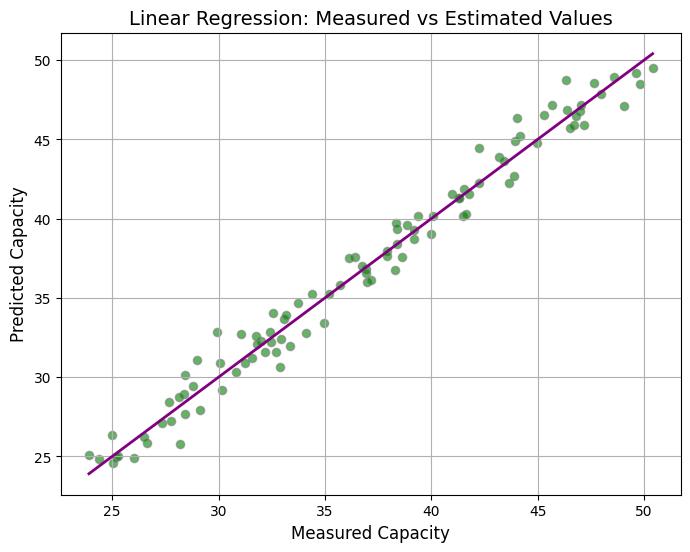

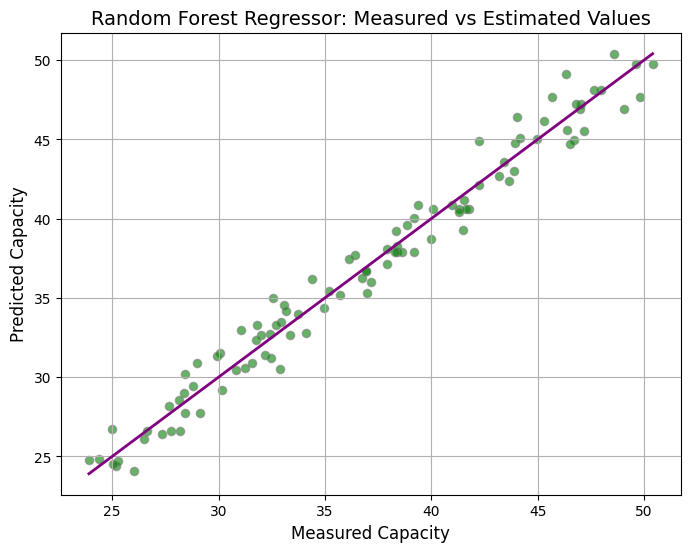

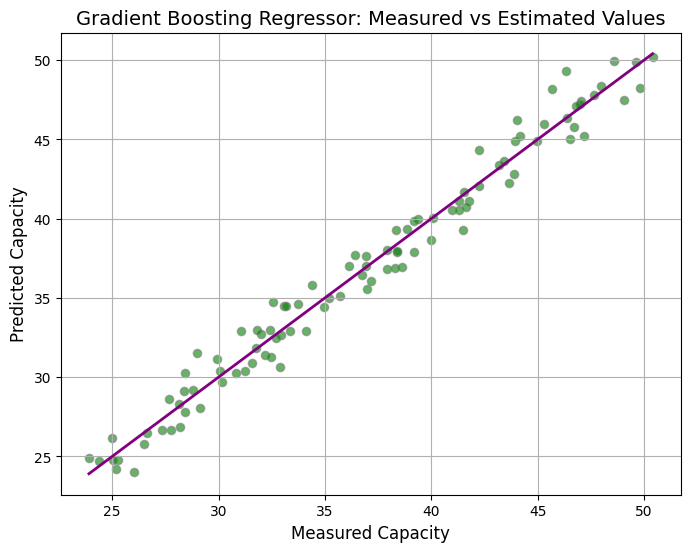

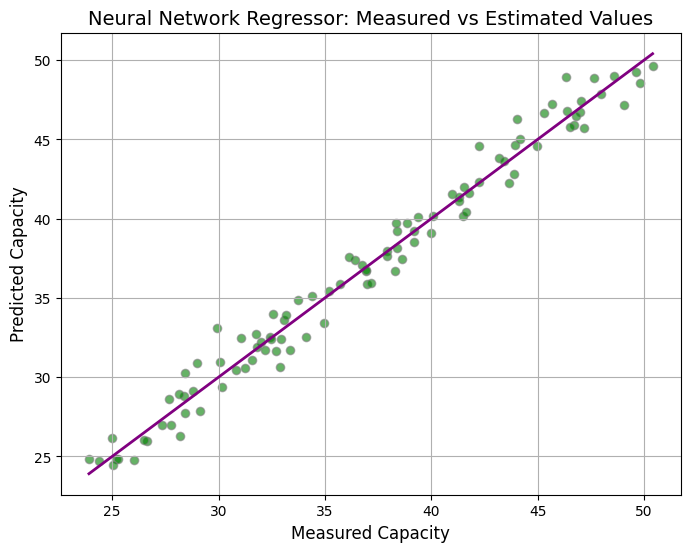

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize comparison of actual and predicted values
def plot_actual_vs_predicted(y_actual, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_actual, y_pred, alpha=0.6, color='green', edgecolor='gray')  # Scatter points color & edge
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'purple', lw=2)  # Reference diagonal line
    plt.title(title, fontsize=14)
    plt.xlabel("Measured Capacity", fontsize=12)    # Changed xlabel
    plt.ylabel("Predicted Capacity", fontsize=12)   # Changed ylabel
    plt.grid(True)
    plt.show()

# Plot actual vs predicted capacity for each model
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    plot_actual_vs_predicted(y_test, y_pred, f"{name}: Measured vs Estimated Values")


In [ ]:
#The best model is the tuned Gradient Boosting Regressor, as it achieves the lowest MSE and highest R² after hyperparameter optimization.